In [32]:
%matplotlib inline
import altair as alt
import pandas as pd
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [33]:
data = pd.read_csv('abalone.data', names=['Sex','Length',
                                        'Diameter','Height',
                                        'Whole weight', 'Shucked weight', 
                                        'Viscera weight', 'Shell weight', 
                                        'Rings'])

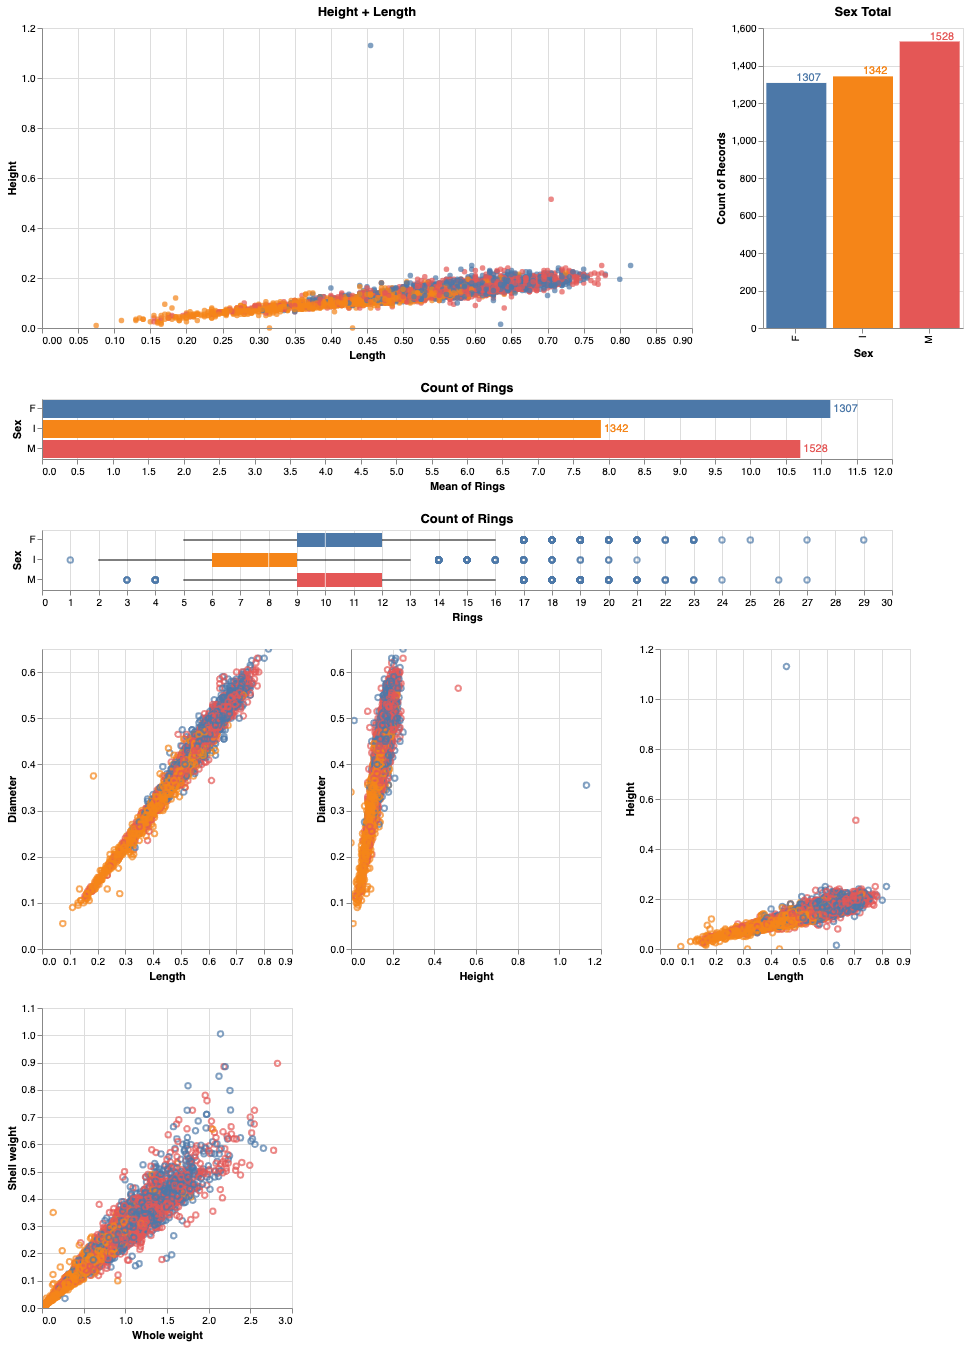

In [34]:
brush = alt.selection(type='interval')
#A = ['M', 'F', 'I']
ratings = ['M', 'F', 'I']

rating_radio = alt.binding_radio(options=ratings)

rating_select = alt.selection_single(fields=['Sex'], bind=rating_radio, name="Sex")
rating_color_condition = alt.condition(rating_select,
                      alt.Color('Sex:N', legend=None),
                      alt.value('lightgray'))


# the top scatterplot
HeightLengthScatter = alt.Chart(title='Height + Length').mark_point(filled = True).encode(
    x='Length:Q',
    y='Height:Q',
    color=alt.condition(brush, 'Sex:N', alt.value('lightgray')),
    
).properties(
    selection=brush,
    width=650,
    
).add_selection(
    rating_select
).encode(
    color=rating_color_condition,
    tooltip=['Height', 'Length', 'Diameter', 'Rings', 'Sex']
)


# the right Category Bar Chart
sexChart = alt.Chart(title='Sex Total').mark_bar().encode(
    y='count()',
    color='Sex:N',
    x='Sex:N'
).transform_filter(
    brush.ref()
).encode(
    color=rating_color_condition
).properties(
    width=200
)

sexText = sexChart.mark_text(
    align='left',
    baseline='middle',
    dy=-5 # Nudges text to the right so it doesn't appear on the top of the bar.
).encode(
    text='count()'
)

'''legend = alt.Chart().mark_point().encode(
            y=alt.Y('Sex:N', axis=alt.Axis(orient='right')),
            color='Sex'
).add_selection(
    selection
)'''

highlight = alt.selection(type='single', on='mouseover',
                          fields=['symbol'], nearest=True)

noOfRings = alt.Chart(title='Count of Rings').mark_bar().encode(
    x='mean(Rings)',
    y='Sex:N',
    color='Sex:N',
).transform_filter(
    brush.ref()
).properties(
    width = 850, 
    #height = 150
).encode(
    color=rating_color_condition
)

ringText = noOfRings.mark_text(
    align='left',
    baseline='middle',
    dx=3 # Nudges text to the right so it doesn't appear on the top of the bar.
).encode(
    text='count()'
)

noOfRings2 = alt.Chart(title='Count of Rings').mark_boxplot().encode(
    x='mean(Rings)',
    y='Sex:N',
    color='Sex:N',
).transform_filter(
    brush.ref()
).properties(
    width = 850, 
    #height = 150
).encode(
    color=rating_color_condition
)

lengthDiameterScatter = alt.Chart().mark_point().encode(
    x='Length:Q',
    y='Diameter:Q',
    color='Sex:N'
).transform_filter(
    brush.ref()
).properties(
    width = 250
).encode(
    color=rating_color_condition
).interactive()

heightLengthScatter2 = alt.Chart().mark_point().encode(
    x='Length:Q',
    y='Height:Q',
    color='Sex:N'
).transform_filter(
    brush.ref()
).properties(
    width = 250
).encode(
    color=rating_color_condition
).interactive()

heightDiameterScatter = alt.Chart().mark_point().encode(
    x='Height:Q',
    y='Diameter:Q',
    color='Sex:N'
).transform_filter(
    brush.ref()
).properties(
    width = 250
).encode(
    color=rating_color_condition
).interactive()

shellWholeWeightScatter = alt.Chart().mark_point().encode(
    y='Shell weight:Q',
    x='Whole weight:Q',
    color='Sex:N'
).transform_filter(
    brush.ref()
).properties(
    width = 250
).encode(
    color=rating_color_condition
).interactive()


chart = alt.vconcat(HeightLengthScatter | (sexChart + sexText), (noOfRings + ringText), noOfRings2, lengthDiameterScatter | heightDiameterScatter | heightLengthScatter2, shellWholeWeightScatter, data=data)
chart#.transform_sample(sample=1750) #


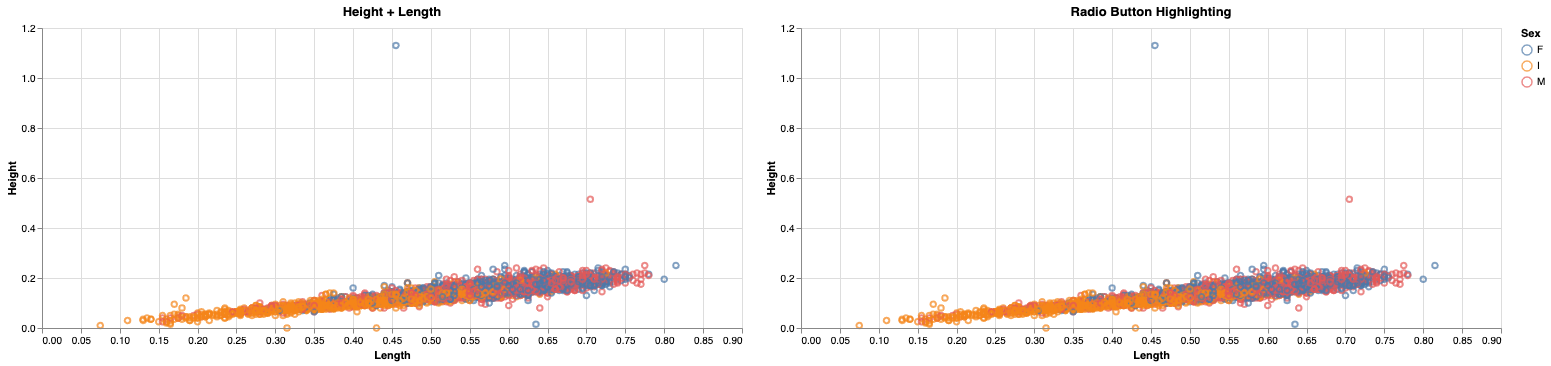

In [37]:
brush = alt.selection(type='interval')
ratings = ['M', 'F', 'I']
# the top scatterplot
HeightLengthScatter = alt.Chart(title='Height + Length').mark_point().encode(
    x='Length:Q',
    y='Height:Q',
    color=alt.condition(brush, 'Sex:N', alt.value('lightgray'))
).properties(
    selection=brush,
    width=700
)

rating_radio = alt.binding_radio(options=ratings)

rating_select = alt.selection_single(fields=['Sex'], bind=rating_radio, name="Sex Selection")
rating_color_condition = alt.condition(rating_select,
                      alt.Color('Sex:N', legend=None),
                      alt.value('lightgray'))

highlight_ratings = HeightLengthScatter.add_selection(
    rating_select
).encode(
    color=rating_color_condition
).properties(title="Radio Button Highlighting")

chart = alt.vconcat(HeightLengthScatter | highlight_ratings, data = data)
chart.add_selection(
    rating_select
)


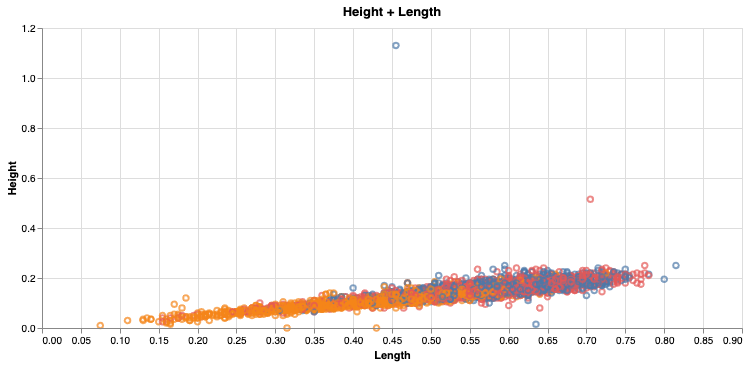

In [36]:
brush = alt.selection(type='interval')
A = ['M', 'F', 'I']
ratings = ['M', 'F', 'I', A]

rating_radio = alt.binding_radio(options=ratings)

rating_select = alt.selection_single(fields=['Sex'], bind=rating_radio, name="Sex")
rating_color_condition = alt.condition(rating_select,
                      alt.Color('Sex:N', legend=None),
                      alt.value('lightgray'))


# the top scatterplot
HeightLengthScatter = alt.Chart(title='Height + Length').mark_point().encode(
    x='Length:Q',
    y='Height:Q',
    color=alt.condition(brush, 'Sex:N', alt.value('lightgray'))
).properties(
    selection=brush,
    width=700
).add_selection(
    rating_select
).encode(
    color=rating_color_condition

)



chart = alt.vconcat(HeightLengthScatter, data = data)
chart

In [38]:
#A place for the imports
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

abalone = pd.read_csv('abalone.data')
abalone.columns=['Sex','Length','Diameter','Height','Whole weight', 'Shucked weight','Viscera weight', 
                 'Shell weight','Rings']

# Data Exploration

In [39]:
abalone.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1732,M,0.665,0.500,0.175,1.2975,0.6075,0.3140,0.3150,9
3390,M,0.545,0.420,0.125,0.9745,0.3530,0.1740,0.3050,13
3060,M,0.630,0.495,0.180,1.3100,0.4950,0.2950,0.4695,10
2453,I,0.275,0.200,0.065,0.0920,0.0385,0.0235,0.0270,5
3737,F,0.635,0.505,0.170,1.2635,0.5120,0.3220,0.3550,9


In [40]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
Sex               4176 non-null object
Length            4176 non-null float64
Diameter          4176 non-null float64
Height            4176 non-null float64
Whole weight      4176 non-null float64
Shucked weight    4176 non-null float64
Viscera weight    4176 non-null float64
Shell weight      4176 non-null float64
Rings             4176 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [41]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [42]:
abalone = abalone[abalone.Height > 0]
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4174.000000,4174.00000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000
mean,0.524081,0.40795,0.139594,0.829080,0.359509,0.180672,0.238855,9.933876
std,0.120079,0.09923,0.041725,0.490384,0.221971,0.109612,0.139222,3.223660
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442125,0.186125,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153750,0.502000,0.253000,0.328875,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27474dd0>,
      dtype=object)

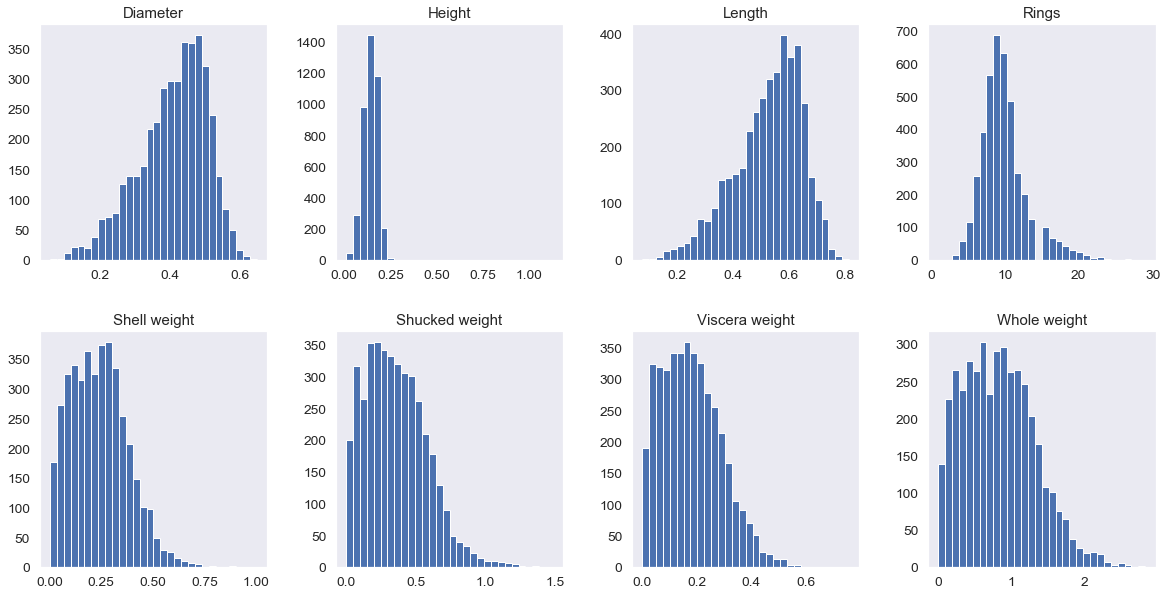

In [43]:
abalone.hist(figsize=(20,10), grid = False, layout=(2,4), bins = 30)

In [44]:
nf = abalone.select_dtypes(include=[np.number]).columns
cf = abalone.select_dtypes(include=[np.object]).columns

In [45]:
skew_list = stats.skew(abalone[nf])
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.165670
7,Rings,1.114409
4,Shucked weight,0.718103
6,Shell weight,0.620477
5,Viscera weight,0.590854
3,Whole weight,0.529975
1,Diameter,-0.610222
0,Length,-0.641130


# Scatter Plots

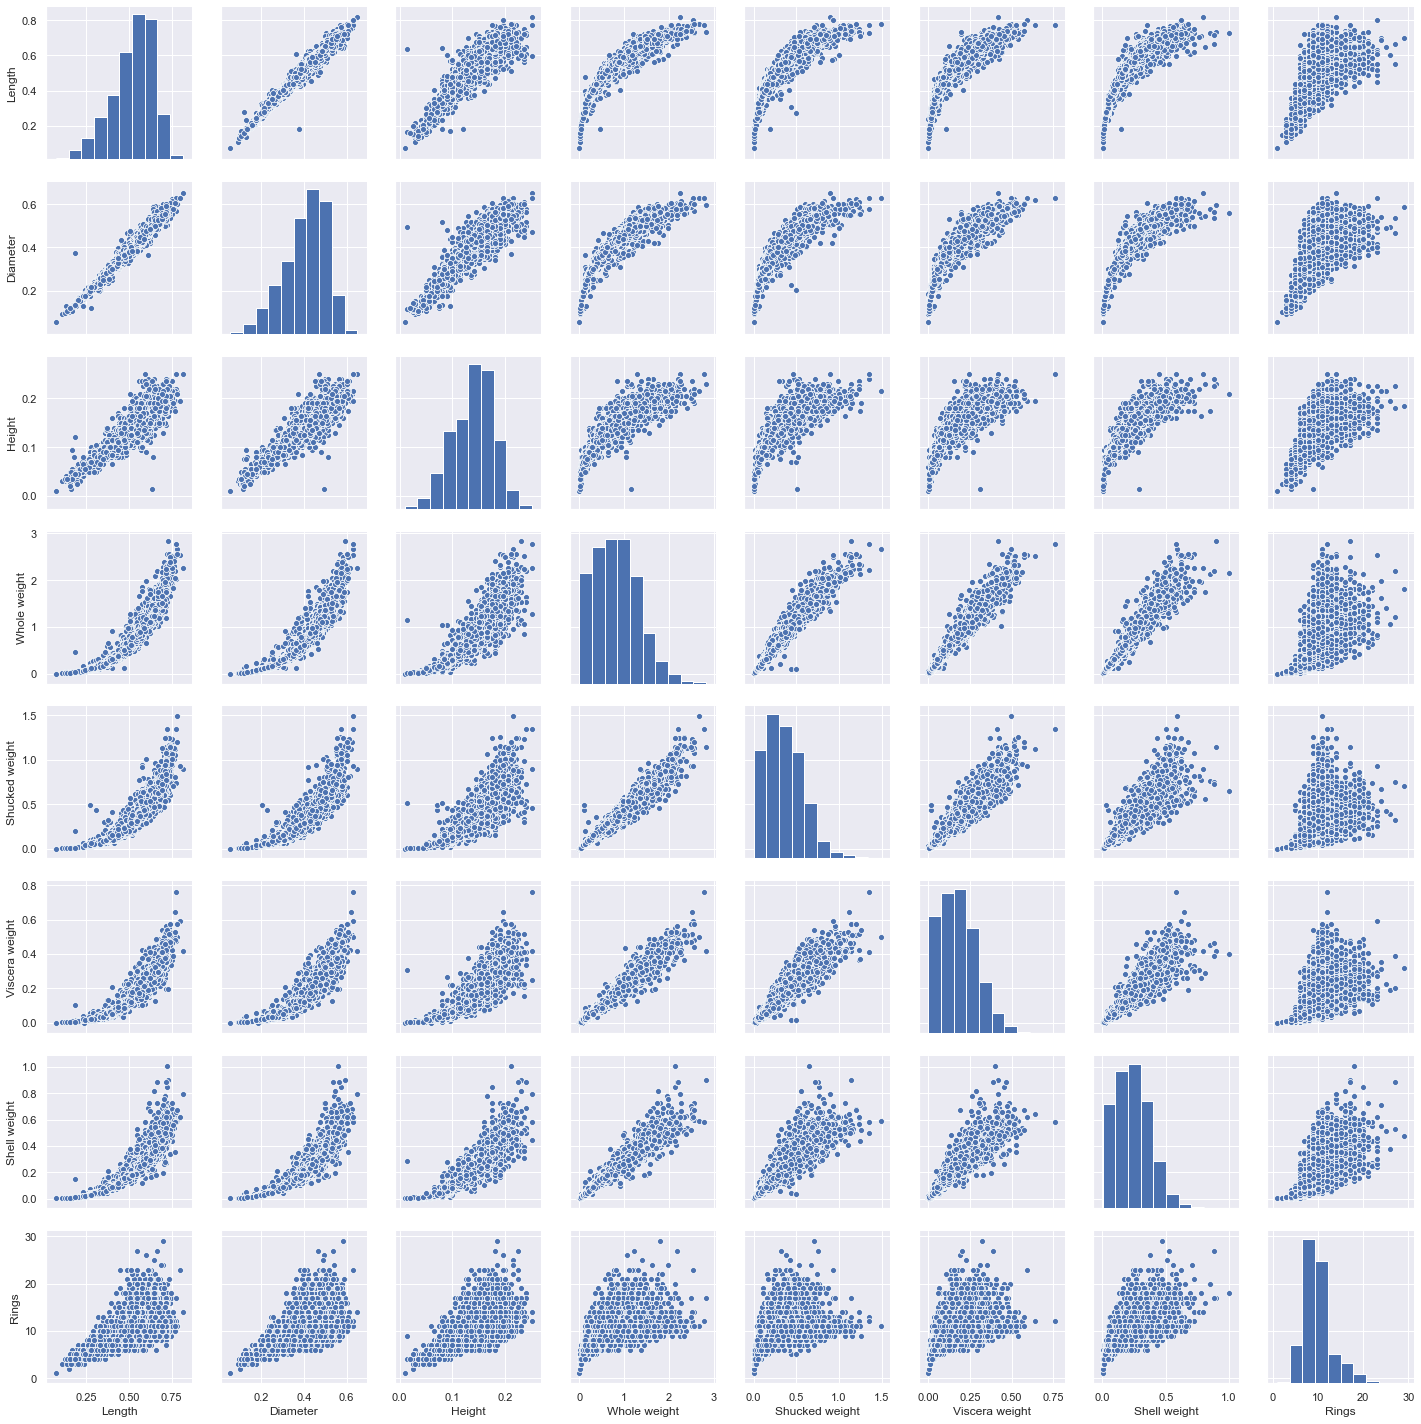

In [65]:
sns.set()
cols = ['Length','Diameter','Height','Whole weight', 'Shucked weight','Viscera weight', 'Shell weight','Rings']

sns.pairplot(abalone[cols], height = 2.5)

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


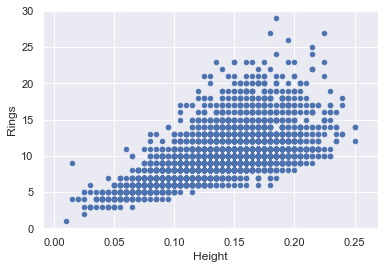

In [47]:
abalone = abalone[abalone.Height < 0.4]
data = pd.concat([abalone['Rings'], abalone['Height']], axis = 1)
data.plot.scatter(x='Height', y='Rings', ylim=(0,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23b9bb50>,
      dtype=object)

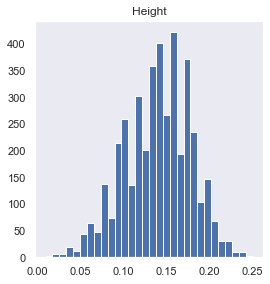

In [48]:
abalone.hist(column = 'Height', figsize=(20,10), grid=False, layout=(2,4), bins = 30)

# Correlation Matrix

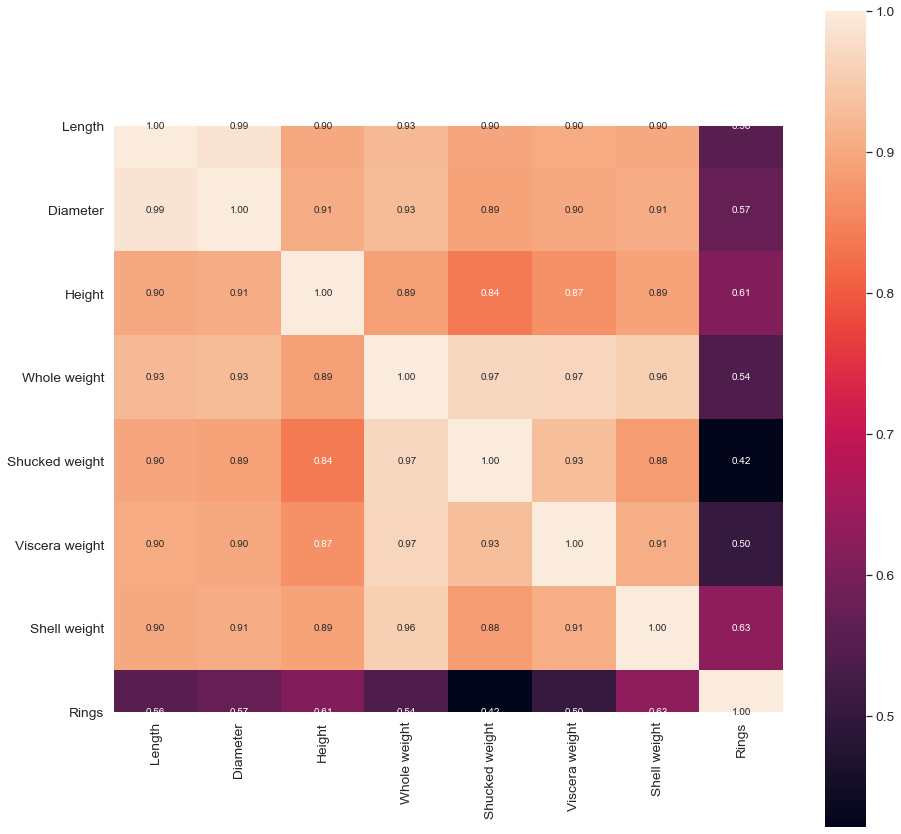

In [49]:
corrmat = abalone.corr()
cols = corrmat.nlargest(8, 'Rings')['Rings'].index
cm = np.corrcoef(abalone[nf].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(15,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=nf.values, xticklabels=nf.values)
plt.show()

# Categorical Feature

(-0.5, 2.5, 0, 30)

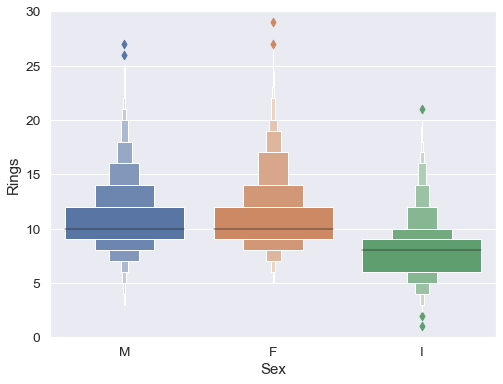

In [50]:
data = pd.concat([abalone['Rings'], abalone['Sex']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='Sex', y="Rings", data=abalone)
fig.axis(ymin=0, ymax=30)

# Linear Regression Model

In [51]:
abalone = pd.get_dummies(abalone)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0,1,0


In [52]:
X = abalone.drop(['Rings'], axis = 1)
y = abalone['Rings']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

# Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression 
paramLin = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
LinearReg = GridSearchCV(LinearRegression(),paramLin, cv = 10)
LinearReg.fit(X = X_train,y= y_train)
LinearRegmodel = LinearReg.best_estimator_
print(LinearReg.best_score_, LinearReg.best_params_)

0.5379632795825943 {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [55]:
LinearReg.score(X_train,y_train)

0.5448037512495065

In [56]:
LinearReg.score(X_test,y_test)

0.5387831067294273

Text(0, 0.5, 'Predictions')

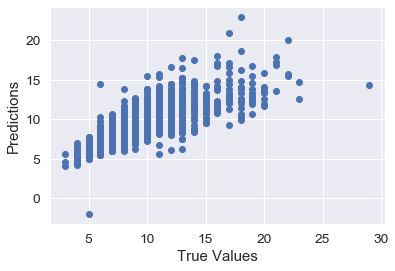

In [57]:
predictions = LinearReg.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Ridge Regression

In [58]:
# Must do

# K-means

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [60]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_std)
y_kmeans = kmeans.predict(X_std)

[[-1.44977855 -1.44066115 -1.28393888 ... -0.6750462  -0.68786906
   1.31679344]
 [ 0.04952353  0.12170909 -0.11119058 ...  1.48138009 -0.68786906
  -0.75942055]
 [-0.70012751 -0.43268035 -0.37180132 ... -0.6750462  -0.68786906
   1.31679344]
 ...
 [ 0.63258544  0.67609853  1.71308455 ... -0.6750462  -0.68786906
   1.31679344]
 [ 0.84082184  0.77689661  0.27972552 ...  1.48138009 -0.68786906
  -0.75942055]
 [ 1.5488256   1.48248317  1.45247382 ... -0.6750462  -0.68786906
   1.31679344]]


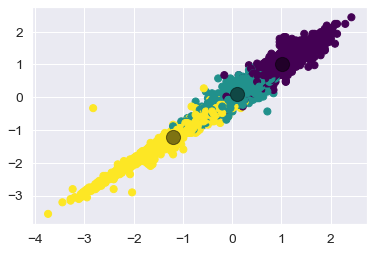

In [61]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

print(X_std)

In [63]:
alt.Chart(X_std).mark_point().encode(
    x='Length',
    y='Diameter'
)

ValueError: Length encoding field is specified without a type; the type cannot be automatically inferred because the data is not specified as a pandas.DataFrame.

alt.Chart(...)

# PCA

In [ ]:
corr_mat = np.corrcoef(X_std.T)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(corr_mat)
print('\nEigenvalues \n%s' %eigenvalues)

In [ ]:
#eigenvalue and eigenvector pairs
pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
pairs.sort(key = lambda x: x[0], reverse = True)

In [ ]:
sorted_eigenval = []
for i in pairs:
    sorted_eigenval.append(i[0])
print(sorted_eigenval)

In [ ]:
total = sum(eigenvalues)
variance_explained = [(i/total)*100 for i in sorted_eigenval]

In [ ]:
variance_explained

In [ ]:
cum_variance_explained = np.cumsum(variance_explained)
cum_variance_explained

In [ ]:
#Plot variance explained by the principal components
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8, 6))
    plt.bar(range(10), variance_explained, alpha=0.7, align='center',
            label='individual explained variance')
    plt.step(range(10), cum_variance_explained, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
projection_mat = np.hstack((pairs[0][1].reshape(10,1),
                           pairs[1][1].reshape(10,1),
                           pairs[2][1].reshape(10,1)))

In [ ]:
X_new = X_std.dot(projection_mat)
X_new.shape

In [ ]:
new_data = pd.DataFrame({'x': X_new[0],
                        'y': X_new[1],
                        'label': ['PC1', 'PC2']})

alt.Chart(projection_mat).mark_point().encode(
    x='x',
    y='y'
)

# Classification

In [ ]:
abalone.head(5)

In [ ]:
bins = [0,8,10,abalone['Rings'].max()]
group_names = ['young','medium','old']
abalone['Rings'] = pd.cut(abalone['Rings'],bins, labels = group_names)

In [ ]:
dictionary = {'young':0, 'medium':1, 'old':2}
abalone['Rings'] = abalone['Rings'].map(dictionary)

In [ ]:
abalone.head(10)

In [ ]:
X = abalone.drop(['Rings'], axis = 1)
y = abalone['Rings']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

# KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
paramsKn = {'n_neighbors':range(1,30)}
Kneighbours = GridSearchCV(KNeighborsClassifier(),paramsKn, cv=10)

Kneighbours.fit(X=X_train,y=y_train)
Kmodel = Kneighbours.best_estimator_
print(Kneighbours.best_score_, Kneighbours.best_params_)

alt.Chart(Kmodel).mark_point().encode(
    x=X[:, 0],
    y=y[:, 1]
)

In [ ]:
from util import *

from sklearn import tree
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

print ('Reading files')
np_data = read_file()
print ('Separate X and Y')
[X, Y] = separate_X_Y(np_data)
print ('Getting set of outputs')

[X_f, Y_no_transform, Y_equal_size, Y_equal_frequency] = pre_process(X, Y)
len_train = int(2.0*float(len(X_f))/3.0)
X_f = X_f[:len_train]
Y_no_transform = Y_no_transform[:len_train]
Y_equal_size = Y_equal_size[:len_train]
Y_equal_frequency = Y_equal_frequency[:len_train]

accuracies = []
predictions = []

scores_1 = []
scores_2 = []
Ks = []
for i in xrange(100):
    print (i+1, "of 100")
    tree_classifier_1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i+1)
    tree_classifier_2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=i+1)
    Ks.append(i+1)
    
    scores_1.append(np.mean(cross_val_score(tree_classifier_1, X_f, Y_equal_frequency, cv=3, scoring='f1_macro')))
    scores_2.append(np.mean(cross_val_score(tree_classifier_2, X_f, Y_equal_frequency, cv=3, scoring='f1_macro')))

plt.xlabel('Profundidade maxima')
plt.ylabel('F1 score medio - 3 fold')

plt.xlabel('Valor de K')
plt.ylabel('Acuracia media - 3 fold')
entropy, = plt.plot(Ks, scores_1, 'b', label='entropy')
gini, = plt.plot(Ks, scores_2, 'r', label='gini')

plt.legend([entropy, gini], ['entropy', 'gini'])
plt.show()

uniform, = plt.plot(Ks, scores, 'b')

plt.show()
